In [2]:
4

4

In [3]:
%gui qt6

In [4]:
import pyqtgraph as pg 

In [11]:
pw = pg.plot([2,3])

In [10]:
3

3

In [10]:
pw.show()

qt.pointer.dispatch: delivering touch release to same window QWindow(0x0) not QWidgetWindow(0x1630ccbc0, name="PlotWidgetClassWindow")
qt.pointer.dispatch: skipping QEventPoint(id=1 ts=0 pos=0,0 scn=438.471,186.863 gbl=438.471,186.863 Released ellipse=(1x1 ∡ 0) vel=0,0 press=-438.471,-186.863 last=-438.471,-186.863 Δ 438.471,186.863) : no target window


In [12]:
from pyqtgraph.Qt import QtGui

In [13]:
q = QtGui.QPlainTextEdit()

In [14]:
q.show()

In [42]:
q.setReadOnly(True)

In [44]:
q.setPlainText('''
asdf sadf sdf
asdfas
asdf
asdf
asdf
asdf
asdf
asdf
asdf
asdfasdfasdfasdfasdfasfasdf
asdfasdfsadf''')
q.show()

sdf () {}


In [35]:
def fun(*x, **xx): print('sdf',x,xx)

In [38]:
q.textChanged.connect(fun)

In [37]:
q.textChanged.disconnect()

In [1]:
5

5

In [2]:
# -*- coding: utf-8 -*-
"""
Demonstrates common image analysis tools.

Many of the features demonstrated here are already provided by the ImageView
widget, but here we present a lower-level approach that provides finer control
over the user interface.
"""
# import initExample ## Add path to library (just for examples; you do not need this)

%gui qt

import pyqtgraph as pg
from pyqtgraph.Qt import QtCore, QtGui
import numpy as np


# Interpret image data as row-major instead of col-major
pg.setConfigOptions(imageAxisOrder='row-major')

pg.mkQApp()
win = pg.GraphicsLayoutWidget()
win.setWindowTitle('pyqtgraph example: Image Analysis')

# A plot area (ViewBox + axes) for displaying the image
p1 = win.addPlot(title="")

# Item for displaying image data
img = pg.ImageItem()
p1.addItem(img)

# Custom ROI for selecting an image region
roi = pg.ROI([-8, 14], [6, 5])
roi.addScaleHandle([0.5, 1], [0.5, 0.5])
roi.addScaleHandle([0, 0.5], [0.5, 0.5])
p1.addItem(roi)
roi.setZValue(10)  # make sure ROI is drawn above image

# Isocurve drawing
iso = pg.IsocurveItem(level=0.8, pen='g')
iso.setParentItem(img)
iso.setZValue(5)

# Contrast/color control
hist = pg.HistogramLUTItem()
hist.setImageItem(img)
win.addItem(hist)

# Draggable line for setting isocurve level
isoLine = pg.InfiniteLine(angle=0, movable=True, pen='g')
hist.vb.addItem(isoLine)
hist.vb.setMouseEnabled(y=False) # makes user interaction a little easier
isoLine.setValue(0.8)
isoLine.setZValue(1000) # bring iso line above contrast controls

# Another plot area for displaying ROI data
win.nextRow()
p2 = win.addPlot(colspan=2)
p2.setMaximumHeight(250)
win.resize(800, 800)
win.show()


# Generate image data
data = np.random.normal(size=(200, 100))
data[20:80, 20:80] += 2.
data = pg.gaussianFilter(data, (3, 3))
data += np.random.normal(size=(200, 100)) * 0.1
img.setImage(data)
hist.setLevels(data.min(), data.max())

# build isocurves from smoothed data
iso.setData(pg.gaussianFilter(data, (2, 2)))

# set position and scale of image
tr = QtGui.QTransform()
img.setTransform(tr.scale(0.2, 0.2).translate(-50, 0))

# zoom to fit imageo
p1.autoRange()  


# Callbacks for handling user interaction
def updatePlot():
    global img, roi, data, p2
    selected = roi.getArrayRegion(data, img)
    p2.plot(selected.mean(axis=0), clear=True)

roi.sigRegionChanged.connect(updatePlot)
updatePlot()

def updateIsocurve():
    global isoLine, iso
    iso.setLevel(isoLine.value())

isoLine.sigDragged.connect(updateIsocurve)

def imageHoverEvent(event):
    """Show the position, pixel, and value under the mouse cursor.
    """
    if event.isExit():
        p1.setTitle("")
        return
    pos = event.pos()
    i, j = pos.y(), pos.x()
    i = int(np.clip(i, 0, data.shape[0] - 1))
    j = int(np.clip(j, 0, data.shape[1] - 1))
    val = data[i, j]
    ppos = img.mapToParent(pos)
    x, y = ppos.x(), ppos.y()
    p1.setTitle("pos: (%0.1f, %0.1f)  pixel: (%d, %d)  value: %.3g" % (x, y, i, j, val))

# Monkey-patch the image to use our custom hover function. 
# This is generally discouraged (you should subclass ImageItem instead),
# but it works for a very simple use like this. 
img.hoverEvent = imageHoverEvent

# if __name__ == '__main__':
#     pg.exec()


qt.pointer.dispatch: delivering touch release to same window QWindow(0x0) not QWidgetWindow(0x12ad5ddf0, name="GraphicsLayoutWidgetClassWindow")
qt.pointer.dispatch: skipping QEventPoint(id=1 ts=0 pos=0,0 scn=998.796,277.224 gbl=998.796,277.224 Released ellipse=(1x1 ∡ 0) vel=0,0 press=-998.796,-277.224 last=-998.796,-277.224 Δ 998.796,277.224) : no target window


In [11]:
dd=pg.TableWidget()
dd.setData([1,2])
dd.show()
win.show()


In [55]:
def get_treated_da( ds ):
    # todo make sure the da is better
    # da should not have nans
    da = ds[ 'dndlDp' ]
    rt = 5  # averaging time in minutes
    len_ldp = 0.0646  # delta lDp
    
    da1 = da.dropna( 'time' , how='all' ).dropna( 'Dp' , how='all' )
    dr = da1.resample( { 'time': f'{rt}T' } , label='left' ).mean()
    
    dr[ 'time' ] = dr[ 'time' ] + pd.Timedelta( rt / 2 , 'minutes' )
    
    dr[ 'lDp' ] = np.log10( dr[ 'Dp' ] )
    
    dr1 = dr.swap_dims( { 'Dp': 'lDp' } )
    
    drange = np.arange( dr[ 'lDp' ].min() , dr[ 'lDp' ].max() , len_ldp / 4 )
    
    dr2 = dr1.interp( { 'lDp': drange } )
    
    dr2 = dr2.coarsen( { 'lDp': 4 } , boundary='trim').mean()
    dr2[ 'lDp' ] = dr2[ 'lDp' ] + len_ldp / 2
    
    dr2 = dr2.interpolate_na( dim='time' , limit=2 )
    
    assert dr2.isnull().sum().item() == 0
    
    dr2 = dr2.where( dr2 > 0 , -10 )

    dr3 = dr2.transpose( 'time' , 'lDp' )
    
    return dr3

In [12]:
import useful_scit.p

from useful_scit.imps2.defs import (
    pd, np, xr, za, mpl, sns, os, glob, 
    dt, sys, crt, Path, pprint, ucp, log, pjoin, plt
)
from useful_scit.imps2.defs import *


In [13]:
from useful_scit.imps2.defs import *

In [45]:
p = '/Volumes/mbProD/bolivia_campaign_data/NAIS3_CHC_processed2021/level2/data_out/lev2_NAISp20180531np.sum'

In [52]:
import psd_ftools.funs as fu
import banana_inspector

ModuleNotFoundError: No module named 'banana_inspector'

In [47]:
ds = fu.open_sum2ds(p)

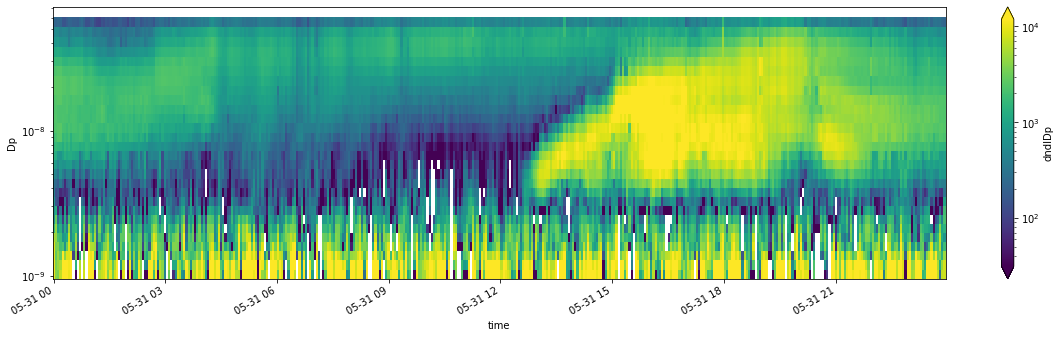

In [65]:
vmin = ds['dndlDp'].quantile(.05).item()
vmax = ds['dndlDp'].quantile(.95).item()
ds['dndlDp'].plot(
    yscale='log',
    norm = mpl.colors.LogNorm(vmin=vmin,vmax=vmax),
    cmap='viridis',
    figsize = (20,5)
)

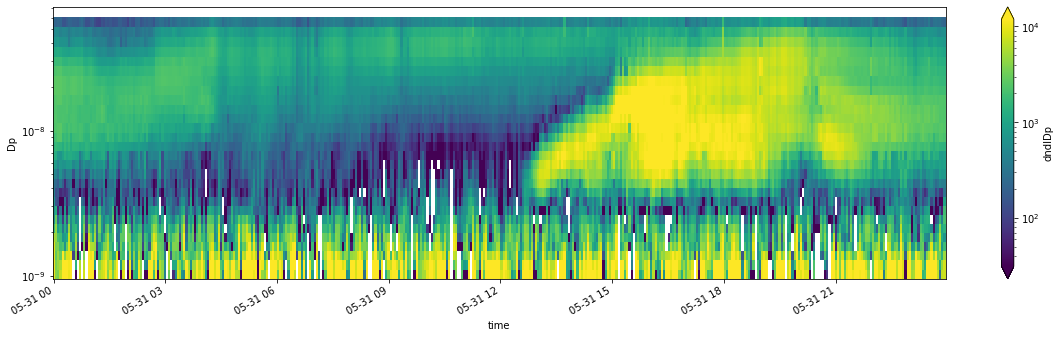

In [70]:
d1

<xarray.Dataset>
Dimensions:     (time: 288, Dp: 29)
Coordinates:
  * time        (time) datetime64[ns] 2018-05-31 ... 2018-05-31T23:55:00
  * Dp          (Dp) float64 1.024e-09 1.183e-09 ... 5.617e-08 6.588e-08
Data variables:
    dndlDp      (time, Dp) float64 7.019e+03 7e+03 6.178e+03 ... 593.0 212.5 nan
    conc        (time) float64 4.086e+03 2.967e+03 ... 2.637e+03 3.422e+03
    log_Dp_dis  (time, Dp) float64 0.06261 0.06263 0.06265 ... 0.06925 0.06925

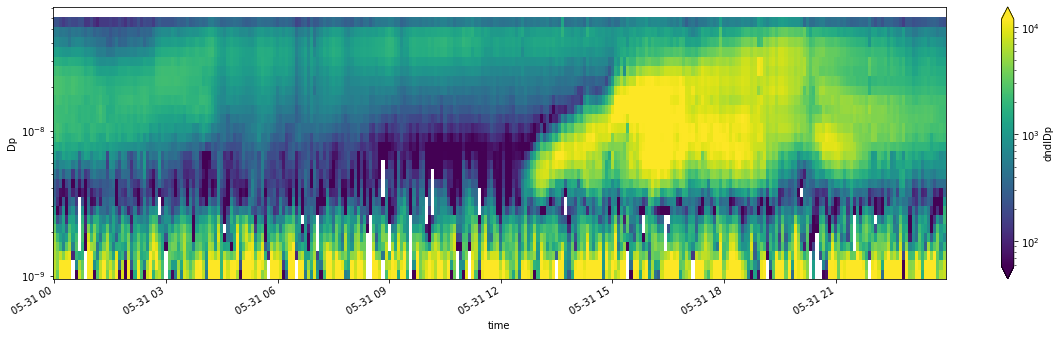

In [72]:
d1 = ds.resample( { 'time': f'5T' } , label='left' ).mean()

vmin = d1['dndlDp'].quantile(.05).item()
vmax = d1['dndlDp'].quantile(.95).item()
d1['dndlDp'].plot(
    yscale='log',
    norm = mpl.colors.LogNorm(vmin=vmin,vmax=vmax),
    cmap='viridis',
    figsize = (20,5),
    x='time'
)

In [126]:
def gauss_astro( da_ , xminutes , ylog ):
    
    dt = da_['time'].diff('time').mean().item()/1e9 / 60
    dy = np.log(da_['Dp']).diff('Dp').mean().item()
    
    xpixel = xminutes / dt 
    ypixel = ylog / dy
    if xpixel == 0:
        xpixel = .0001
    if ypixel == 0:
        ypixel = .0001
        
    da = da_.transpose('Dp','time')
    
    from astropy.convolution import Gaussian2DKernel
    from astropy.convolution import convolve
    kernel = Gaussian2DKernel( x_stddev=xpixel , y_stddev=ypixel )
    res = convolve( da , kernel )
    nda = xr.ones_like( da ) * res
    return nda

In [130]:
def gau_plot(x,y):
    d2 = gauss_astro(d1['dndlDp'],x,y)

    vmin = d2.quantile(.05).item()
    vmax = d2.quantile(.95).item()
    d2.plot(
        yscale='log',
        norm = mpl.colors.LogNorm(vmin=vmin,vmax=vmax),
        cmap='viridis',
        figsize = (20,5),
        x='time'
    )
    

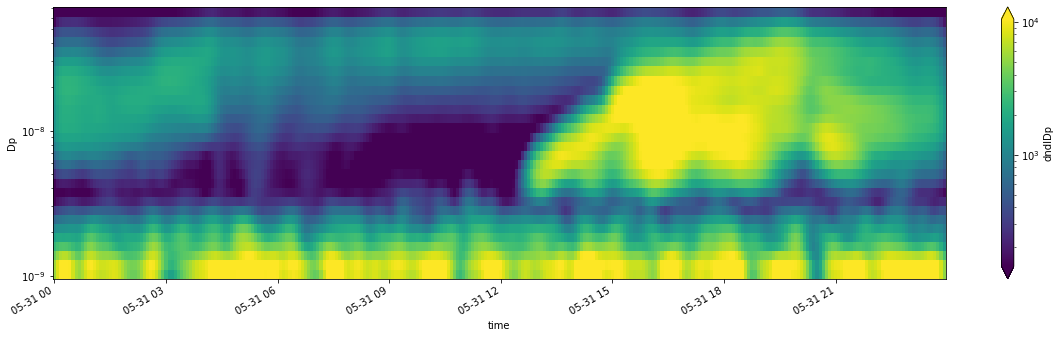

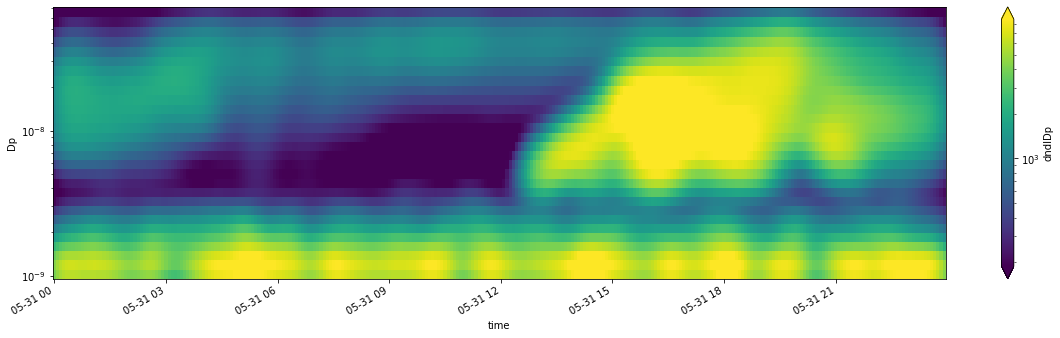

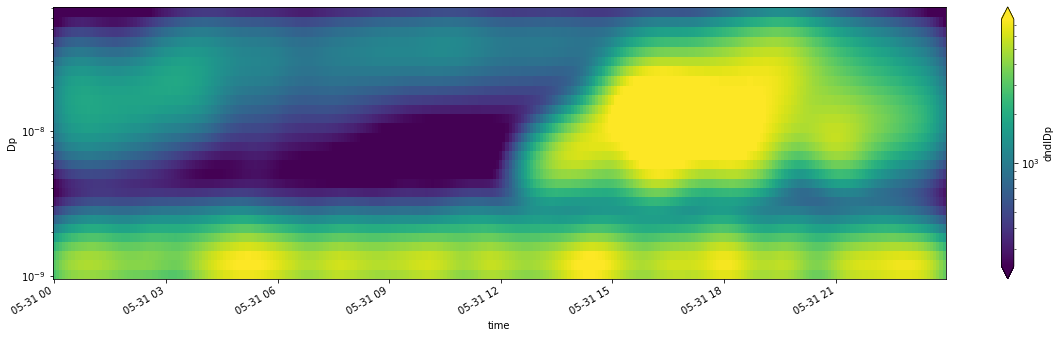

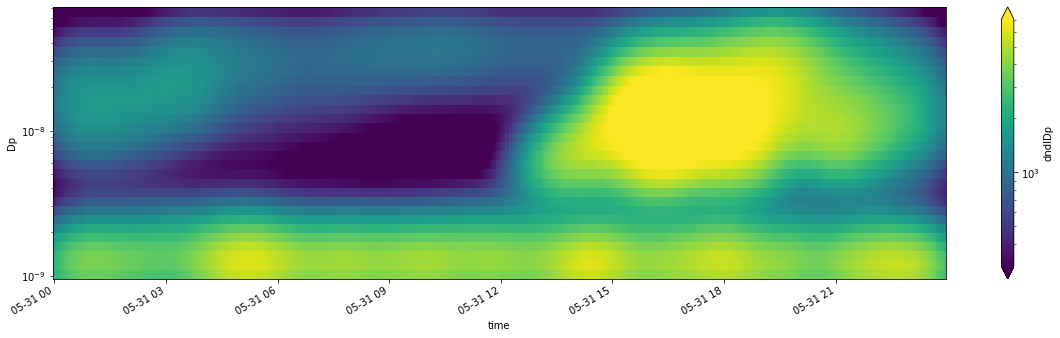

In [132]:
x = [10,20,30,40]
y = [.1,.2,.3,.4]

for x_,y_ in zip(x,y):
    gau_plot(x_,y_)

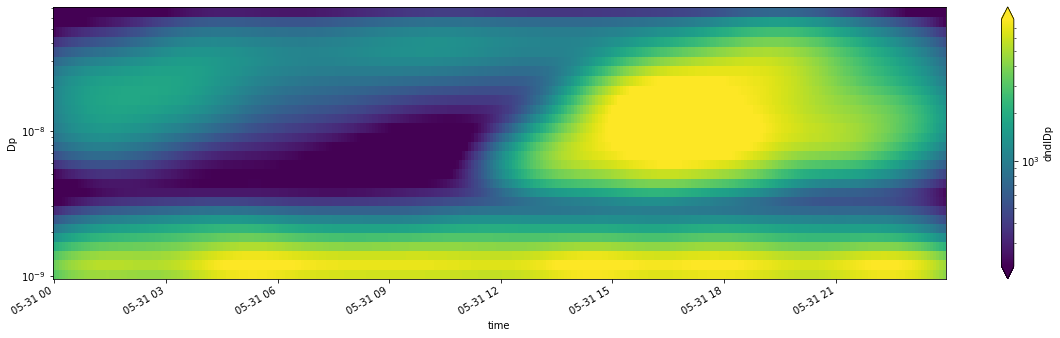

In [128]:
d2 = gauss_astro(d1['dndlDp'],60,.2)

vmin = d2.quantile(.05).item()
vmax = d2.quantile(.95).item()
d2.plot(
    yscale='log',
    norm = mpl.colors.LogNorm(vmin=vmin,vmax=vmax),
    cmap='viridis',
    figsize = (20,5),
    x='time'
)

In [150]:
da = d1['dndlDp']

In [154]:
qm = da.quantile(.05,'time')
qM = da.quantile(.95,'time')

In [175]:
import pyqtgraph as pg

In [2]:
import useful_scit.p

from useful_scit.imps2.defs import (
    pd, np, xr, za, mpl, sns, os, glob, 
    dt, sys, crt, Path, pprint, ucp, log, pjoin, plt
)
from useful_scit.imps2.defs import *


In [1]:
from useful_scit.imps2.defs import *

In [2]:
%gui qt6

In [3]:
sys.path.insert(0,'/Users/aliaga/py-packs/banana_inspector-parent/banana_inspector')

In [24]:
from banana_inspector.plotters import BananaPlot 
from banana_inspector.nodes.PeelNode import BnnPeelROI2

In [90]:
bp = BananaPlot.BananaPlot(None)

bb = BnnPeelROI2()
bb.draw_me_in_plot(bp.plot_item)
bp.plot_example()
bb.setVisible(False)
bp.plot_item.restoreState(ss)
bp.show()

qt.pointer.dispatch: delivering touch release to same window QWindow(0x0) not QWidgetWindow(0x14c00bb30, name="BananaPlotClassWindow")
qt.pointer.dispatch: skipping QEventPoint(id=0 ts=0 pos=0,0 scn=585.952,422.005 gbl=585.952,422.005 Released ellipse=(1x1 ∡ 0) vel=0,0 press=-585.952,-422.005 last=-585.952,-422.005 Δ 585.952,422.005) : no target window
qt.pointer.dispatch: skipping QEventPoint(id=1 ts=0 pos=0,0 scn=541.67,415.344 gbl=541.67,415.344 Released ellipse=(1x1 ∡ 0) vel=0,0 press=-541.67,-415.344 last=-541.67,-415.344 Δ 541.67,415.344) : no target window
qt.pointer.dispatch: delivering touch release to same window QWindow(0x0) not QWidgetWindow(0x14c00bb30, name="BananaPlotClassWindow")
qt.pointer.dispatch: skipping QEventPoint(id=1 ts=0 pos=0,0 scn=693.972,559.769 gbl=693.972,559.769 Released ellipse=(1x1 ∡ 0) vel=0,0 press=-693.972,-559.769 last=-693.972,-559.769 Δ 693.972,559.769) : no target window


In [95]:
bb.setVisible(True)
bp.show()

qt.pointer.dispatch: delivering touch release to same window QWindow(0x0) not QWidgetWindow(0x14c00bb30, name="BananaPlotClassWindow")
qt.pointer.dispatch: skipping QEventPoint(id=1 ts=0 pos=0,0 scn=585.591,507.056 gbl=585.591,507.056 Released ellipse=(1x1 ∡ 0) vel=0,0 press=-585.591,-507.056 last=-585.591,-507.056 Δ 585.591,507.056) : no target window


In [71]:
ss = bp.plot_item.saveState()

In [91]:
cc = bp.ci.items

In [92]:
ccc=list(cc.keys())

In [93]:
ab = ccc[0]

In [94]:
ab.saveState()

{'gradient': {'mode': 'rgb',
  'ticks': [(0.0, (68, 1, 84, 255)),
   (0.25, (58, 82, 139, 255)),
   (0.5, (32, 144, 140, 255)),
   (0.75, (94, 201, 97, 255)),
   (1.0, (253, 231, 36, 255))],
  'ticksVisible': True},
 'levels': (3.0366342853897663, 3.3740540224839286),
 'mode': 'mono'}

In [46]:
bb.get_roi_view_coords()

[]

In [29]:
res = da.plot(row='Dp',sharey=False,size = 2,aspect=5,yscale='symlog')
axs = res.axes.flatten()
for i,ax in enumerate(axs): 
#     print(i)
    ax.set_ylim(qm[i],qM[i])

NameError: name 'da' is not defined

In [173]:
from skimage import exposure

ModuleNotFoundError: No module named 'skimage'

In [ ]:
.plot(
    yscale='log',
    norm = mpl.colors.LogNorm(vmin=vmin,vmax=vmax),
    cmap='viridis'
)

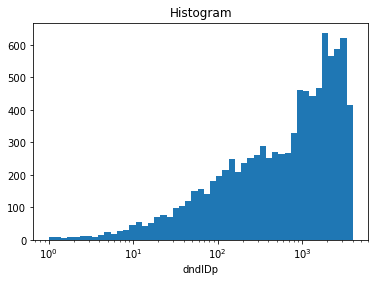

In [30]:
ds['dndlDp'].plot.hist(bins=np.geomspace(1,4000));
plt.gca().set_xscale('log')

In [96]:
pg

NameError: name 'pg' is not defined